<h1 style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 5px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'>
Telco Churn<br><br>
Description
In the rapidly evolving telecommunications industry, understanding and mitigating customer churn has become a critical business concern. This data science project aims to analyze customer churn patterns using historical data and build predictive models to identify customers at risk of churning. By doing so, this project aims to provide actionable insights to Telco, enabling them to implement targeted retention strategies.<br><br>
Goals
<ul>
<li>Data Collection and Preprocessing: Gather and clean Telco customer data to create a comprehensive dataset suitable for analysis.</li>
<li>Exploratory Data Analysis: Perform exploratory analysis to identify trends, patterns, and potential correlations related to customer churn.</li>
<li>Feature Importance Determination: Employ machine learning techniques to assess the importance of various features in predicting churn, aiding in identifying critical factors.</li>
<li>Model Building and Evaluation: Develop predictive models for customer churn, compare their performance, and select the most effective one for accurate churn prediction.</li>


<h1 style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'>
Imports</h1>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from prepare import telco_pipeline, telco_prep, telco_modeling
from visuals import plot_churn_distribution, plot_churn_by_internet_service, plot_churn_vs_payment_method, plot_churn_vs_tenure_histogram, plot_churn_vs_monthly_charges_histogram
from explore import chi2_internet_service, chi2_internet_service_type, chi2_payment_method, ttest_churn_vs_tenure, ttest_monthly_charges
from model import get_tree, get_forest, get_logreg, get_knn, get_forest_test

<h1 style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'>Acquire
<br>
<ul>
<li>Data acquired from Codeup servers.</li>
<li>It contained 7,043 rows and 20 columns before cleaning</li>
<li>Each row represents a customer of Telco.</li>
<li>Each column represents a feature of the customer's account.</li>

<h1 style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'>Prepare<br>
<br>

* Removed unnecessary columns associated with joining table IDs
* Checked for nulls in the data
    * Replaced new customer's total charges value from blank to 0
    * Replaced internet service type nulls with "No internet service"
* Checked that column data types were appropriate
    * Changed data type of total charges from object to float
* Encoded categorical variables to binary "dummy" variables
    * Removed columns that did not contain useful information (duplicate info)
* Renamed columns to promote readability
* Split data into train, validate and test, stratifying on 'churn'
* Outliers have not been removed for this iteration of the project

<h1 style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'>Dictionary<br>
<br>

| Feature| Description |
|:-------|:------------|
| Senior Citizen| Whether the customer is a senior citizen (0 for no, 1 for yes)|
| Tenure| Number of months the customer has been with the Telco|
| Monthly Charges| Monthly charges incurred by the customer|
| Total Charges| Total charges incurred by the customer over the entire period|
| Male| Gender of the customer (True for male, False for female)|
| Partner| Whether the customer has a partner (spouse) (True for yes, False for no)|
| Dependents| Whether the customer has dependents (True for yes, False for no)|
| Phone Service| Whether the customer has phone service (True for yes, False for no)|
| Multiple Lines| Whether the customer has multiple phone lines (True for yes, False for no)|
| Online Security| Whether the customer has online security service (True for yes, False for no)|
| Online Backup| Whether the customer has online backup service (True for yes, False for no)|
| Device Protection| Whether the customer has device protection service (True for yes, False for no)|
| Tech Support| Whether the customer has technical support service (True for yes, False for no)|
| Streaming TV| Whether the customer has streaming TV service (True for yes, False for no)|
| Streaming Movies| Whether the customer has streaming movie service (True for yes, False for no)|
| Paperless Billing| Whether the customer has opted for paperless billing (True for yes, False for no)|
| Churn| Whether the customer has churned (True for churned, False for not churned)|
| Contract Month| Whether the customer is on a month-to-month contract (True for yes, False for no)|
| Contract One Year| Whether the customer is on a one-year contract (True for yes, False for no)|
| Contract Two Year| Whether the customer is on a two-year contract (True for yes, False for no)|
| Internet DSL| Whether the customer uses DSL internet service (True for yes, False for no)|
| Internet Fiber Optic| Whether the customer uses fiber optic internet service (True for yes, False for no)|
| Payment Bank Transfer| Whether the customer pays through bank transfer (True for yes, False for no)|
| Payment Credit Card| Whether the customer pays through credit card (True for yes, False for no)|
| Payment Electronic Check| Whether the customer pays through electronic check (True for yes, False for no)|
| Payment Mailed Check| Whether the customer pays through mailed check (True for yes, False for no)|

</h1>

<h1 style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'>
A brief look at the data

In [2]:
# acquiring, preparing the data
# splitting data into train, validate, and test
df = telco_prep()

# Lets increase the max columns since we have over 20
pd.set_option('display.max_columns', None)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,internet_service_type,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,contract_type,payment_method,payment_type,paperless_billing,monthly_charges,total_charges,churn
0,Female,No,Yes,Yes,9,Yes,No,Yes,DSL,No,No,No,No,No,No,Yes,One year,Mailed check,Manual,Yes,65.6,593.30,No
1,Male,No,No,No,9,Yes,Yes,Yes,DSL,No,No,No,No,No,No,No,Month-to-month,Mailed check,Manual,No,59.9,542.40,No
2,Male,No,No,No,4,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,No,Month-to-month,Electronic check,Manual,Yes,73.9,280.85,Yes
3,Male,Yes,Yes,No,13,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,No,Month-to-month,Electronic check,Manual,Yes,98.0,1237.85,Yes
4,Female,Yes,Yes,No,3,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,No,Month-to-month,Mailed check,Manual,Yes,83.9,267.40,Yes


<h1 style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'>A summery of the data

In [3]:
print(df.describe())
print()
print(df.shape)

            tenure  monthly_charges  total_charges
count  7043.000000      7043.000000    7043.000000
mean     32.371149        64.761692    2279.734304
std      24.559481        30.090047    2266.794470
min       0.000000        18.250000       0.000000
25%       9.000000        35.500000     398.550000
50%      29.000000        70.350000    1394.550000
75%      55.000000        89.850000    3786.600000
max      72.000000       118.750000    8684.800000

(7043, 23)


<h1 style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'>Explore

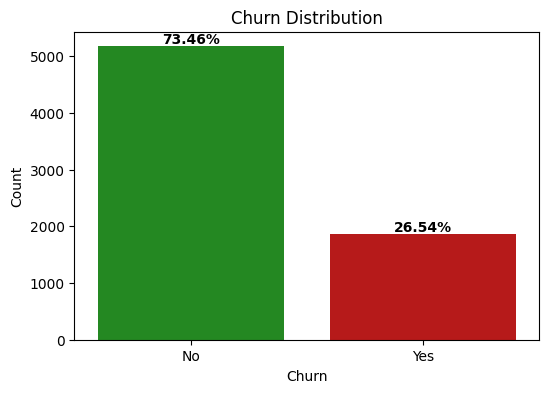

In [4]:
# Display overall churn chart
plot_churn_distribution(df)

36% of our customers have churned.

# Does Internet Type Affect Churn?

We will compare the churn rates across different internet service types.

Internet type contains three unique values: 'DSL', 'Fiber optic', and 'No internet service'.

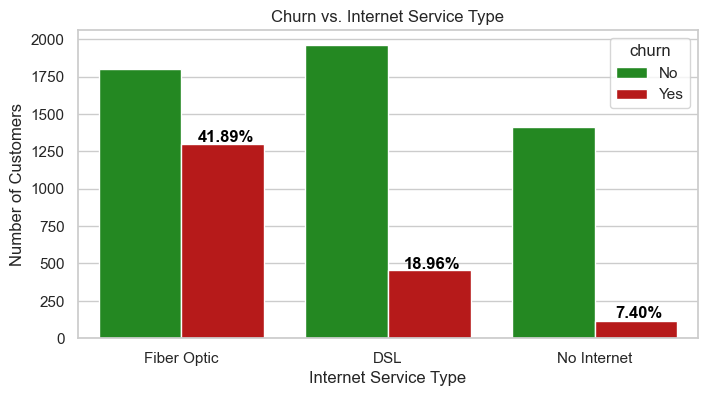

In [5]:
plot_churn_by_internet_service(df)

Churn ratio percentage is 15% higher on customers with Fiber Optic service.

##### Null Hypothesis (H<sub>0</sub>): The type of internet service does not have any significant effect on customer churn.

##### Alternative Hypothesis (H<sub>a</sub>): The type of internet service has a significant effect on customer churn.

We use a chi-squared test for independence to examine the relationship between Churn and Internet Service.

Chi-Square Test
* Confidance interval of 95%
* Alpha .05

In [6]:
chi2_internet_service_type(df)

Chi-Squared Value: 732.309589667794
P-value: 0.0000


##### We have strong evidence to reject the null hypothesis.

P value is near 0. Therefore we have evidende so support that churn and internet type are related. Based on this and the large difference in distribution, using internet service featrue in modeling will likely have a large positive impact on the model's accuracy. 

<h1 style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'>Does payment method have an affect on churn?

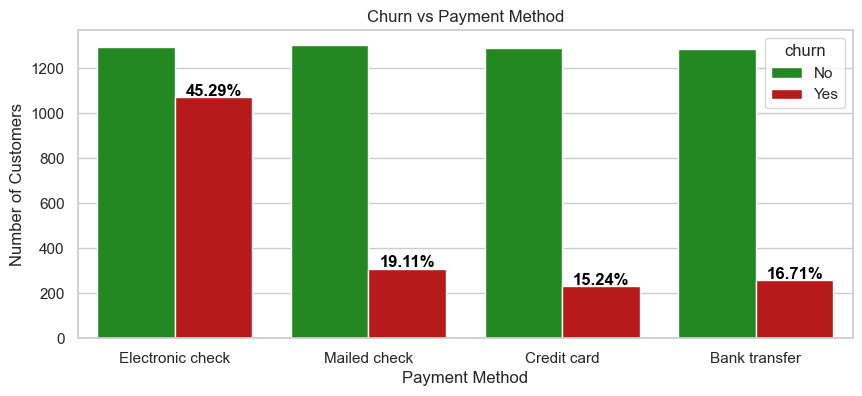

In [7]:
plot_churn_vs_payment_method(df)

Churn ratio percentage is 18% higher on customers with Electronic check.

##### Null Hypothesis (H<sub>0</sub>): The payment method does not have any significant effect on customer churn.

##### Alternative Hypothesis (H<sub>a</sub>): The payment method has a significant effect on customer churn. 

Lets use the Chi-Square test to confirm Churn and Payment Method is related

Chi-Square Test
* Confidance interval of 95%
* Alpha .05

In [8]:
chi2_payment_method(df)

Chi-Squared Value: 648.1423274814
P-value: 0.0000
There is a significant association between payment method and churn.


##### We have strong evidence to reject the null hypothesis.

P value is near 0. Therefore we have evidende so support that churn and payment method are related. Based on this and the large difference is ratio, using internet service featrue in modeling will likely have a large positive impact on the model's accuracy. 

<h1 style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'>Does Tenure have an affect on churn?

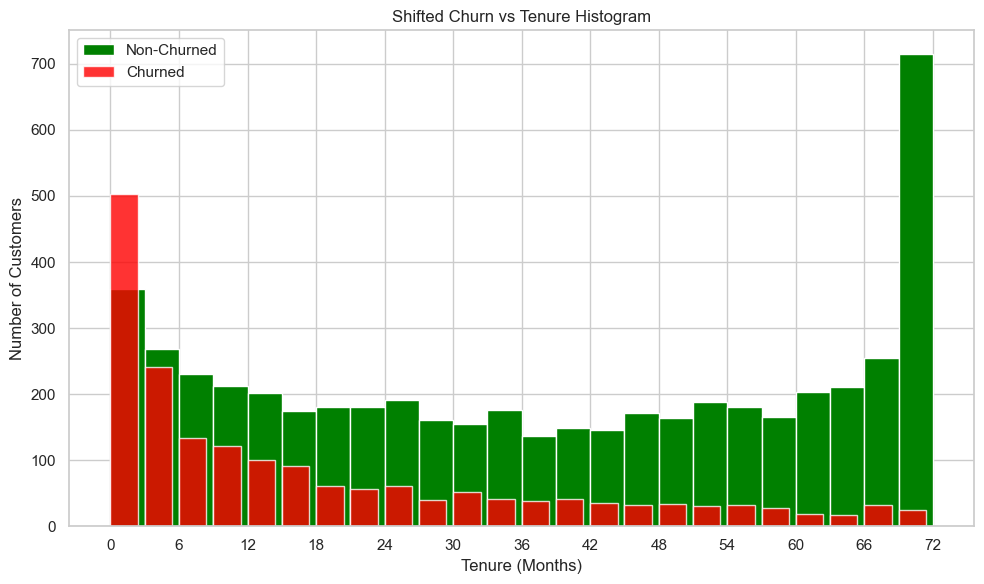

In [9]:
plot_churn_vs_tenure_histogram(df)

The histogram seems to suggest that churn decreases as tenure increses .

##### Null Hypothesis (H<sub>0</sub>): There is no significant relationship between tenure and churn.

##### Alternative Hypothesis (H<sub>a</sub>): There is a significant relationship between tenure and churn.

Lets use the T-Test to determine whether the difference in mean tenure is statistically significant.

T-Test
* Confidance interval of 95%
* Alpha .05

In [10]:
ttest_churn_vs_tenure(df)

T-Statistic: -31.579550511353766
P-Value: 0.0000

There is a significant relationship between tenure and churn.


##### We have strong evidence to reject the null hypothesis.

P value is near 0. which indicates a highly statistically significant relationship between tenure and churn. Incorporating the tenure feature in modeling is expected to  have a large positive impact on the accuracy.

<h1 style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'>Does Monthy Charges have an affect on churn?

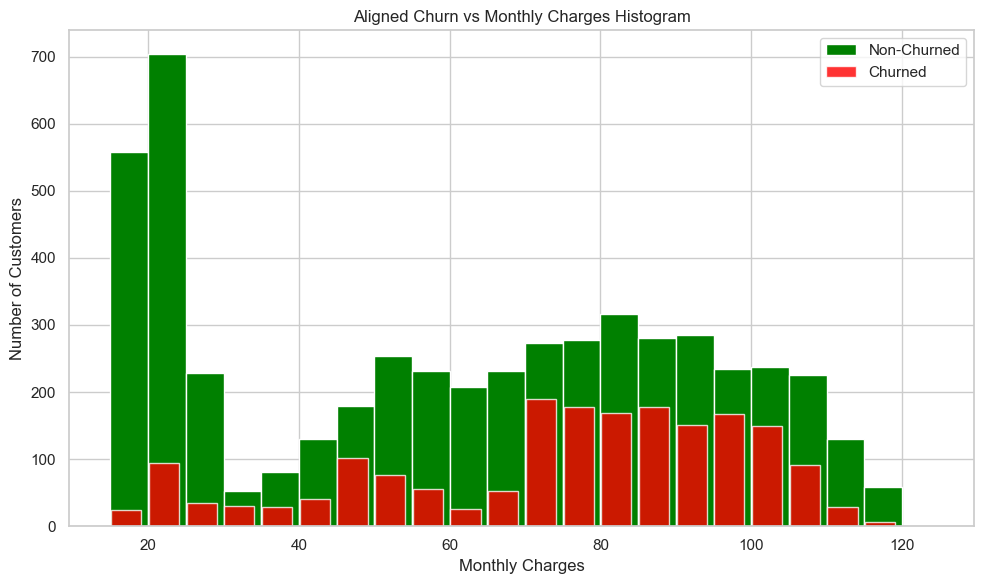

In [11]:
plot_churn_vs_monthly_charges_histogram(df)

The histogram suggest that as monthly charges increase, churn increases.

##### Null Hypothesis (H<sub>0</sub>): There is no significant correlation between higher monthly charges and churned customers.

##### Alternative Hypothesis (H<sub>a</sub>):  There is a significant positive correlation between higher monthly charges and churned customers.
Lets use the T-Test to determine whether the difference in mean monthly charges is statistically significant.

T-Test
* Confidance interval of 95%
* Alpha .05

In [12]:
ttest_monthly_charges(df)

One-tailed t-test results:
T-statistic: 16.536738015936308
P-value: 1.3533228034442077e-60
There is a significant relationship between monthly charges and churn.


##### We have strong evidence to reject the null hypothesis.

P value is near 0. which indicates a highly statistically significant relationship between monthly charges and churn. Incorporating the monthly charges feature in modeling is expected to  have a large positive impact on the accuracy.

### Exploration Summary

* A chi-squared test indicated a significant relationship between internet type and churn
* A chi-squared test indicated a significant relationship between payment method and churn
* A T-Test indicated a significant relationship between tenure and churn
* A T-Test indicated a significant relationship between monthly charges and churn

### Features I am moving to modeling With

* Internet Type
* Payment Method
* Tenure
* Monthly Charges

### Modeling

* I will use accuracy as my evaluation metric
* Unchurned makeup 73% of the data

* by guessing unchurned for every customer one could achieve an accuracy of 73.46% 
* 73.46% will be the baseline accuracy I use for this project
* I will be evaluating models developed using four different model types and various hyperparameter configurations 
* Models will be evaluated on train and validate data 
* The model that performs the best will then be evaluated on test data

In [13]:
train_X, val_X, test_X, train_y, val_y, test_y = telco_modeling()

### Decision Tree

In [14]:
get_tree(train_X, val_X, train_y, val_y)

Decision Tree Model Accuracy on Training Data: 0.8032454361054767
Decision Tree Model Accuracy on Validation Data: 0.8011363636363636


#### The Decicion tree model is a slight improvement to baseline.

### Random Forest

In [15]:
get_forest(train_X, val_X, train_y, val_y)

Accuracy of Random Forest on train is 0.8129817444219067
Accuracy of Random Forest on validate is 0.8058712121212122


#### The Random Forest model is a negligible improvement over the decicion tree model.

### Logistic Regression

In [16]:
get_logreg(train_X, val_X, train_y, val_y)

Accuracy of Logistic Regression on train is 0.8016227180527383
Accuracy of Logistic Regression on validate is 0.7945075757575758


#### The Logistic Regression model is a negligible improvement over baseline and slighly worse than the decicion tree model.

### KNN

In [17]:
get_knn(train_X, val_X, train_y, val_y)

Accuracy of K-Nearest Neighbors on train is 0.8121703853955375
Accuracy of K-Nearest Neighbors on validate is 0.803030303030303


#### The K-Nearest Neighbors model is a negligible improvement over baseline and slighly worse than the decicion tree model.

### Comparing Models

* Decision Tree, Random Forest, and Logistic Regression and K-Nearest Neighbors models all performed about 6% above baseline. 
* Because the results of the Decision Tree, Random Forest, and Logistic Regression and K-Nearest Neighbors models were all very similar I could proceed to test with any of these models.
* I have chosen to move forward with the Random Forest model as it had a the most accurate validation score at 80.6%

### Random Forest on Test Data

In [18]:
get_forest_test(train_X, test_X, train_y, test_y)

Accuracy of Random Forest on train is 0.8129817444219067
Accuracy of Random Forest on validate is 0.7738883632923368


### Modeling Summary

* Decision Tree, Random Forest, and Logistic Regression and K-Nearest Neighbors models all performed about 6% above baseline. 
* Random forest was selected as the final model and had an accuracy of about 77.4% which is only about 4% above the baseline accuracy

### Conclusions

* Electronic Check has the highest distribution of churned customers at 45%
* Fiber Optic internet has the second highest distribution of churned customers at 41%
* There is a correlation between Tenure and Churn.
* There is a correlation between Monthly Charge and Churn.

### Modeling

The final model failed to significantly outperform the baseline. Possible reasons include:

* Not enough features were included in the models

### Recomendations

* Encourage customers to use any payment method other than Electronic Check.
* Encourage customers to sign up for a 12 month contract

### Next Steps

* Add more features to improve the models